### Задание 1

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [5]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test, y_pred)

0.7112260057484929

### Задание 2

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=12,  
                                 min_samples_leaf=30,
                                 random_state=42, 
                                 n_estimators=1000
                                 )

In [19]:
rf_model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, min_samples_leaf=30, n_estimators=1000,
                      random_state=42)

In [21]:
y_test_preds = rf_model.predict(X_test)

In [22]:
r2_score(y_test, y_test_preds)

0.7207632345916866

Модель RandomForest работает чуть лучше, чем линейная регрессия

### Задание 3

In [23]:
?RandomForestRegressor

In [24]:
rf_model.feature_importances_

array([1.01352438e-02, 0.00000000e+00, 7.62625999e-05, 0.00000000e+00,
       1.94866375e-03, 4.35823646e-01, 1.85260267e-04, 1.41463161e-02,
       1.81632473e-04, 4.35630102e-04, 2.78545165e-03, 5.93040261e-04,
       5.33688853e-01])

In [26]:
sum_rf_model = sum(rf_model.feature_importances_)

In [27]:
sum_rf_model

1.0

In [28]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [30]:
from matplotlib import pyplot as plt

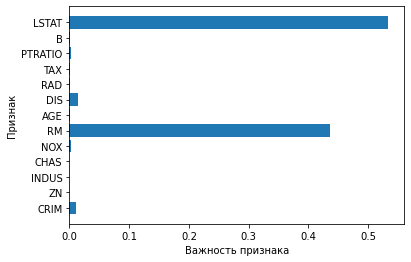

In [31]:
plt.barh(feature_names, rf_model.feature_importances_)

plt.xlabel("Важность признака")
plt.ylabel("Признак")

plt.show()

LSTAT, RM - самые важные признаки